In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True, index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
# Clean the data by filtering out days when the page views were in the
# top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

In [30]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(18,6))
    ax.plot(df.index, df['value'], 'r', linewidth=1)
    
    ax.set_title('Form Views')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return ax


<AxesSubplot:title={'center':'Form Views'}, xlabel='Date', ylabel='Page Views'>

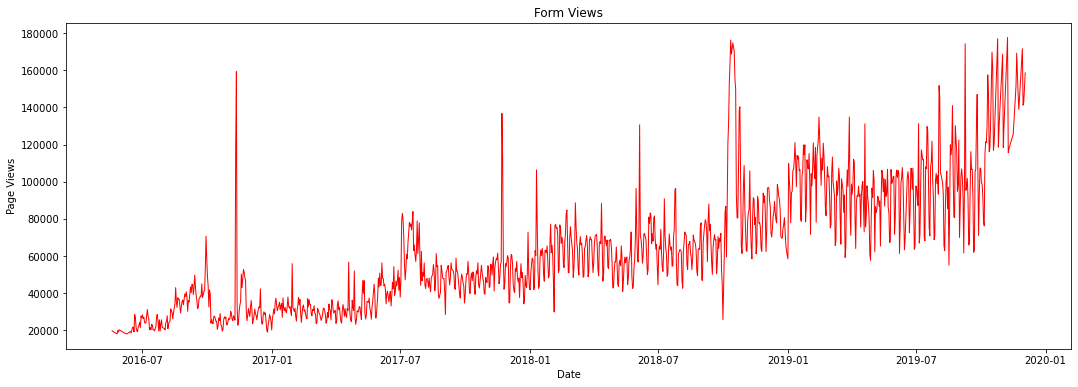

In [31]:
draw_line_plot()

In [49]:
def draw_bar_plot():
    #get month and year
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    #grouby by year and month with mean values
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    
    fig = df_bar.plot.bar( legend=True, figsize=(18,10), ylabel='Avg Page views', xlabel=('Years'))
    plt.legend(['Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize=20)
    
    fig.figure.savefig('Bar_plot.png')
#     fig.savefig('Bar_plot.png') doesnt work idk why
    return fig

<AxesSubplot:xlabel='Years', ylabel='Avg Page views'>

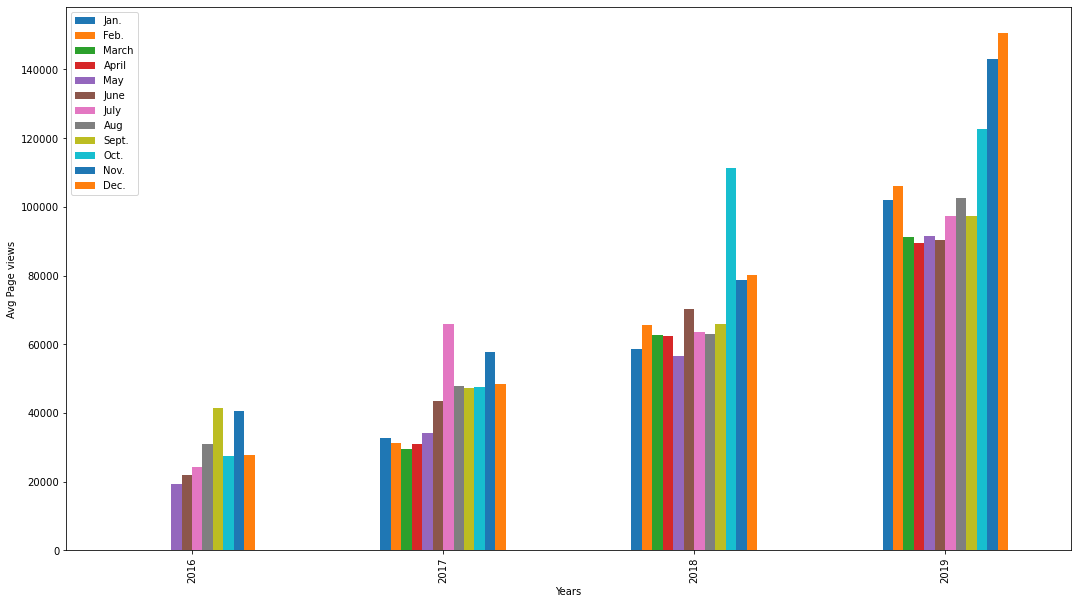

In [48]:
draw_bar_plot()

In [62]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
    ax[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=ax[0])
    ax[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=ax[1])
    
    ax[0].set_title("Year Box Plot (Trend)")
    ax[0].set_xlabel("Month")
    ax[0].set_ylabel('Page View')
    
    ax[1].set_title("Year Box Plot (Trend)")
    ax[1].set_xlabel("Year")
    ax[1].set_ylabel('Page View')
    
    fig.savefig('box_plot.png')
    return ax
    
    

array([<AxesSubplot:title={'center':'Year Box Plot (Trend)'}, xlabel='Month', ylabel='Page View'>,
       <AxesSubplot:title={'center':'Year Box Plot (Trend)'}, xlabel='Year', ylabel='Page View'>],
      dtype=object)

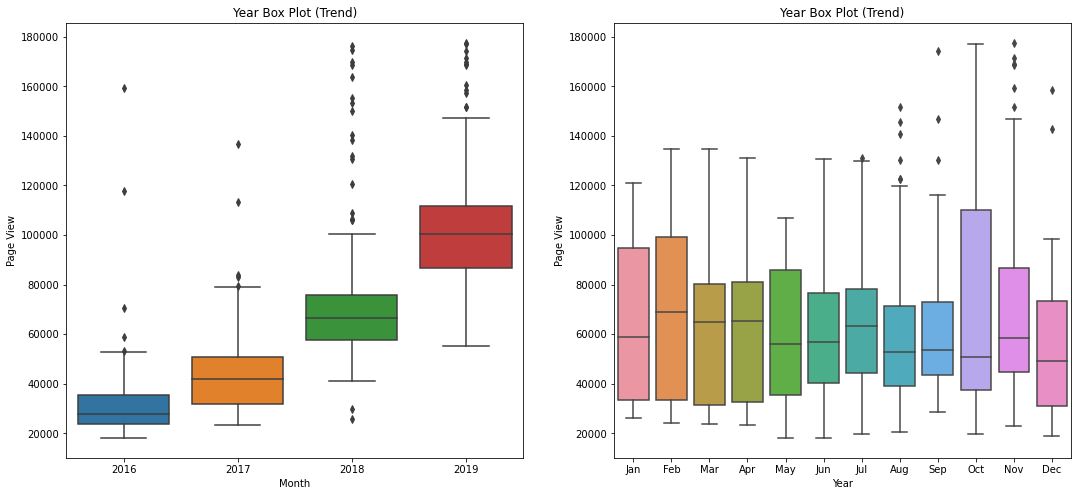

In [63]:
draw_box_plot()